# An Introduction to STORIUM

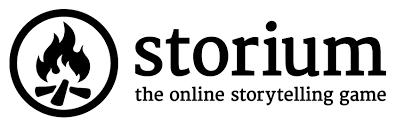

The paper by "Kim, Juntae, et al. "A Multi-Modal Story Generation Framework with AI-Driven Storyline Guidance."" uses the Storium Dataset. This dataset was originally released in the paper  "Storium: A dataset and evaluation platform for machine-in-the-loop story generation." by "Akoury, Nader, et al. 

Our first task is to get familiar with the data. The Stroium Dataset is basically derived from STORIUM - an online creative writing game. Here is an introduction from the website itself describing what STORIUM is all about: *"Write original stories by playing a game with online friends. Storium builds your skills as a writer, exercises your creative juices, and helps you meet new people."*. The 
main novel factor of our dataset are what is called **cards** which are played within the stories. These cards guide the narrative by defining character attributes, goals, and the specifics of each challenge. As such, while STORIUM has fewer stories than datasets like ROCStories or r/writingprompts, the integration of **cards** make the dataset particular suited for more complex story generation tasks that require understanding and maintaining narrative coherence over longer text spans - *something that is the main aim in our project*. 




### How STORIUM the Online Storytelling Game works 

Lets use an example from [Storium](https://storium.com/) website to illustrate how **cards** guide the narrative in the STORIUM game. Suppose a player by the name of Alex starts a new game on STORIUM and becomes the narrator. They choose a fantasy setting and outline a basic plot. The plot for our example is that a group of adventurers must retrieve a mystical artifact to save their kingdom from an eternal winter.Three friends join Alex's game. Player 1 creates a character named "Luna," a skilled archer with the "Deadly Aim" card. Player 2 creates "Thorn," a wizard with a "Master of Elements" card. Player 3 creates "Raven," a stealthy rogue with a "Shadow Walker" card.

Using this as background, we can now define **scenes**. An example of the scene would be the following in the context of our example above - Alex sets the first scene in a bustling town preparing for the winter festival. The challenge is "Gather Information about the Artifact's Location."
- Player 1 writes an entry about talking to the town's elders, utilizing her "Deadly Aim" to win a shooting contest and gain their favor.
- Player 2 describes researching ancient texts in the town library, employing his "Master of Elements" to decipher a hidden message about the artifact.
- Player 3 narrates sneaking into a secretive gathering, using her "Shadow Walker" card to go unnoticed and overhear a crucial clue.



### How STORIUM the dataset works: 

We can use the STORIUM dataset to finetune a narrative generation model. This would involve the following processes: 

1. The model would take in as input **various cards** - scene's introductory text, the challenge, the character's strength and the context from the previous scene entry. These inputs provide the model with a rich context to generate a coherent and relevant story continuation.
2. The model then generates a text to continue the plot. Since it conditions on the cards fed into it as input, the continuation of the plot heavily utilizes the cards produced before. 
3. The generated continuation is meant to be a draft that players can further refine.Players have the opportunity to edit the model's output, adding details, correcting inconsistencies, or steering the story in a preferred direction before finalizing the scene entry
4.  The platform collects these player edits, comparing the original model output with the final published entry. The extent and nature of the edits serve as feedback for evaluating the model's performance, using a metric referred to as the "USER metric." This process helps in understanding how well the model's suggestions align with player expectations and narrative goals.

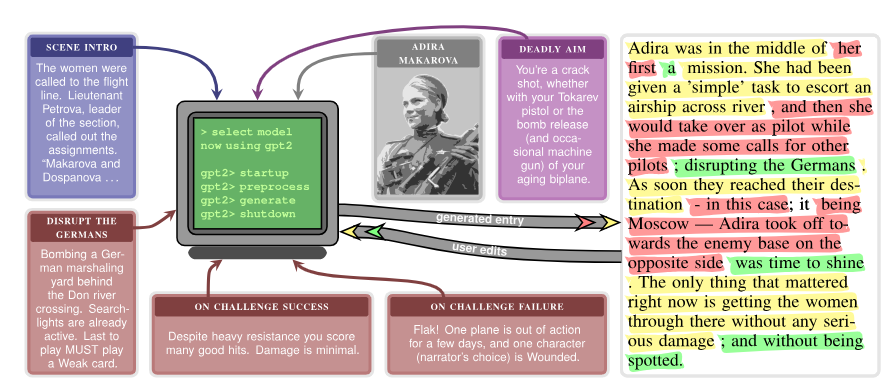


## Exploring the Dataset

Let us now explore the dataset. In total, there are 5743 sstories. From these, the original authors used 569 stories for validation and 570 stories for test. Hence, we have a 8-1-1 split. 

All stories are in `json` format. We have the `test_filenames.txt` which details all the files used for testing, `train_filenames.txt` accounts for all the files used for training and finally we have the validation filenames under `validation_filenames.txt`.  

Let us consider the structure in which these files are arranged by looking at one particular file. For example, lets open `full_export/5/9/591cca.json`. 


In [16]:
import json

dataset_path = r'C:\Users\AWCD\OneDrive\Desktop\CS438 Generative AI\Project\storium_2019_08_22'    
file_path = '/full_export/5/9/591cca.json'
total_path = dataset_path + file_path

with open(total_path, 'r',encoding='utf-8') as file:
    story_data = json.load(file) 

    
#the entire story is extremely large, so if you try to print the entire data, the rate will be exceeded


In [17]:
print(story_data.keys())


dict_keys(['game_pid', 'game_slug', 'game_url', 'exported_at', 'export_version', 'export_docs', 'details', 'cards', 'characters', 'green_room', 'scenes'])


In the above, of particular interests are the following keys: 
- `'cards'`: Contain information about cards.
- `'characters':` Information about the characters involved in the game, including their attributes, backgrounds, and roles.
- `'scenes':` Contains the narrative content of the game, organized into scenes. Each scene likely encompasses a portion of the story, including character actions, challenges, and narrative developments.



### Examining characters in story_data

Lets begin by examining some characters in the story data. For our aims, lets consider just 3

In [20]:

for character in story_data['characters'][:2]: # if you want to see more, adjust this. 
    print(f"Character ID: {character.get('id', 'N/A')}")
    print(f"Character Name: {character.get('name', 'N/A')}")
    print(f"Character Description: {character.get('description', 'N/A')}")
    print("----\n")


Character ID: N/A
Character Name: Alenteile (Lena)
Character Description: At 5’6 with long auburn hair and grey eyes that can slip silver if they catch the light the right way, 25 year old Alenteile O’Shaughnessy can only be described as disarming. Her bright, energetic personality is warm and engaging with a hint of mischief, as if she’s keeping a secret that she’d love to share. In truth, she’s got two. 

First, she is in service to a newly arrived vampire master, running his errands and making sure that his day to day needs are met without interruption. Second, she is his lover and share his hunger for young, pretty lovers and *all* that they offer. 

This petite beauty looks innocent, but she knew at an early age that the sight, smell and taste of blood was a sexual turn on. She tried for a long time to hide that part of herself away, channeling her energies into gymnastics and her academic studies. She knew that to “go goth” would just bring this most taboo secret to the surface. 

### Examining Card Information in story_data


In [ ]:
for card in story_data['cards'][:2]:  
        print(f"Card ID: {card.get('id', 'N/A')}") # if you want to see more, adjust this.
        print(f"Card Name: {card.get('name', 'N/A')}")
        print(f"Card Type: {card.get('type', 'N/A')}")
        print(f"Card Description: {card.get('description', 'N/A')}")
        print("----\n")


# Finetuning our Model on the data 

Before we actually get to the finetuning, we would like to clarify some theoretical details that go into finetetuning. 

### Segment Embeddings 

Let us introduce segment embedding through an example, Suppose you are trying to solve a question-answering using a model like BERT. In this task, the model is given a passage of text along with a question and it needs to find the answer to the question within the passage. A sample input might look as following: **Question: What is the Capital of France?**. **Passage: France, whose capital is Paris, is a country in Western Europe**. In order to process this combined input (question and passage) effectively, the model needs to understand that these are two distinct segments. This is where segment embeddings help. A learned embedding $E_{A}$ is added to every token consiting of Question and another learned embedding $E_{B} is added to token consisting of passage, thereby allowing the model to effectively demarcate between the two. 

Now, in the case of Storium dataset, there are multiple entries, so instead of using just two segments, we will utilize multiple segments. Some of these segments mentioned are the following: 

    1. Intro 
    2. Character 
    3. Challenge Card
    4. Strength Card
    5. Prev Entry
    6. Entry
    7. Title 
    8. Description 

Not only this, but each scene consist of multiple entries and therefore **may reference a difference number of semi-structured cards**. Take the simple example of the sentence: "Lila readies her Silver Bow". This input references the following cards: *Character Card: Lila*, *Item Card: Silver Bow* and *Challenge Card: Defeat the monster**. As such, rather than associating with the input only one segment, the approach in teh paper allows each input token to condition on an arbitrary number of segment embeddings. 

Keeping this in mind, the embedding vector for each token position $(e_{i})$ is calculated by summing the token's embedding $(v_{i})$, its positional embedding $(p_{i})$, and a set of segment embeddings $(s_{i_{1}}, ..., s_{i_{n}})$. This means that each word or token in the input is represented not just by its own meaning and position in the text, but also by its relationship to various segments it might belong to or be related to. 


### Input to Our Model  

Keeping the above discussion in mind, here is the input to our model at the time of training: 
1. The text of the current entry
2. The challenge card
3. The card metadata
4. The current character's biography
5. Scene's Introductory Text 


## Context Packing 

GPT-2 has a limit of the sequence length of 1024 tokens. That means if you provide a text input that is longer than 1024 tokens, GPT-2 would only be able to consider the first 1024 tokens for generating its response. Any additional tokens beyond this limit would be ignored. This is a problem for our dataset  because in our dataset each story averages over 19,000 tokens and is divided into 78 scene entries, far exceeding GPT-2's 1024 token limit. Furthermore, these stories are not uniform; they vary widely in terms of the number and types of contextual elements they include. As such, some segments might need more space while others might not be used at all in certain entries

How to resolve this? The authors use the Cassowary Algorithm. 

### Cassowary Algorithm. 

The Cassowary Algorithm involves solving a system of constraints of the form: 

$$a_{1}x_{1} + a_{2}x_{2} + ... + a_{n}x_{n} <= b $$
$$a_{1}x_{1} + a_{2}x_{2} + ... + a_{n}x_{n} = b $$
$$a_{1}x_{1} + a_{2}x_{2} + ... + a_{n}x_{n} >= b $$

Constraints can be equalities or inequalities, allowing for a flexible system that can describe both hard constraints (must be satisfied) and soft constraints (should be satisfied if possible).Imagine you're designing a simple user interface for a mobile app that displays a header, a content area, and a footer. You want these elements to fit the screen nicely, regardless of the device's screen size. The Cassowary algorithm takes these constraints and calculates the optimal layout of the UI elements.

In the context of token packing for an NLP model, similar principles apply. Instead of UI elements, you're arranging segments of text (tokens) within a limited input space. Constraints might include minimum or maximum numbers of tokens for each segment (e.g., a story entry, character description) to ensure a balanced representation of the story elements within the model's input. The Cassowary algorithm would then calculate an optimal arrangement of these segments, ensuring efficient use of the available input space while adhering to the defined constraints.




    
